In [5]:
import numpy as np
import pandas as pd

In [7]:
s=pd.Series([1,3,5, np.nan,6,8])

In [8]:
dates=pd.date_range('20130101', periods=6)

In [9]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [11]:
df

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-06,-0.793777,-0.238764,0.611620,0.020024


In [15]:
df2 = pd.DataFrame({'A': 1.,'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [16]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [18]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [21]:
df.head(2)

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121


In [23]:
df.tail()

,A,B,C,D
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-06,-0.793777,-0.238764,0.611620,0.020024


In [24]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
#to_numpy does not include the idex or column labels in the o/p
df.to_numpy()

array([[ 0.80483396, -0.01168961, -0.48753902,  0.6702909 ],
       [ 1.0730992 ,  0.91379338,  1.04569461, -0.42812117],
       [-0.41379616, -0.60402259,  1.4003723 ,  0.87667157],
       [ 1.88170867, -1.1700951 ,  0.26051529, -0.57176845],
       [ 0.8921091 , -1.36678454, -1.18131219,  0.59937471],
       [-0.79377689, -0.2387636 ,  0.61161951,  0.02002407]])

In [29]:
df2.to_numpy() # relatively expensive with multiple datatypes

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [31]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.574030,-0.412927,0.274892,0.194412
std,0.996016,0.833208,0.967085,0.610070
min,-0.793777,-1.366785,-1.181312,-0.571768
25%,-0.109139,-1.028577,-0.300525,-0.316085
50%,0.848472,-0.421393,0.436067,0.309699
75%,1.027852,-0.068458,0.937176,0.652562
max,1.881709,0.913793,1.400372,0.876672


In [32]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.804834,1.073099,-0.413796,1.881709,0.892109,-0.793777
B,-0.011690,0.913793,-0.604023,-1.170095,-1.366785,-0.238764
C,-0.487539,1.045695,1.400372,0.260515,-1.181312,0.611620
D,0.670291,-0.428121,0.876672,-0.571768,0.599375,0.020024


In [35]:
# 0->sorts by rows
# 1->sorts by columns
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.793777,-0.238764,0.611620,0.020024
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-01,0.804834,-0.011690,-0.487539,0.670291


In [37]:
# sort by "column name"
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-06,-0.793777,-0.238764,0.611620,0.020024
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121


In [38]:
df['A']

2013-01-01    0.804834
2013-01-02    1.073099
2013-01-03   -0.413796
2013-01-04    1.881709
2013-01-05    0.892109
2013-01-06   -0.793777
Freq: D, Name: A, dtype: float64

In [40]:
#selects those range of rows
df[0:2]

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121


In [41]:
df['A'][0:2]

2013-01-01    0.804834
2013-01-02    1.073099
Freq: D, Name: A, dtype: float64

In [43]:
#selection by label
df.loc[dates[0]]

A    0.804834
B   -0.011690
C   -0.487539
D    0.670291
Name: 2013-01-01 00:00:00, dtype: float64

In [45]:
#selecting on a multi axis by label
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.804834,-0.011690
2013-01-02,1.073099,0.913793
2013-01-03,-0.413796,-0.604023
2013-01-04,1.881709,-1.170095
2013-01-05,0.892109,-1.366785
2013-01-06,-0.793777,-0.238764


In [47]:
#both endpoints are included in l:r
df.loc[dates[0]:dates[2], ['A', 'B']]

,A,B
2013-01-01,0.804834,-0.011690
2013-01-02,1.073099,0.913793
2013-01-03,-0.413796,-0.604023


In [49]:
df.loc[dates[0], 'A'] #access to scaler
df.at[dates[0], 'A'] #faster access to scaler

0.8048339607454693

In [50]:
#selection by position
df.iloc[3]

A    1.881709
B   -1.170095
C    0.260515
D   -0.571768
Name: 2013-01-04 00:00:00, dtype: float64

In [51]:
#boolean indexing

df[df['A']>0]

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375


In [52]:
df[df>0]

,A,B,C,D
2013-01-01,0.804834,NaN,NaN,0.670291
2013-01-02,1.073099,0.913793,1.045695,NaN
2013-01-03,NaN,NaN,1.400372,0.876672
2013-01-04,1.881709,NaN,0.260515,NaN
2013-01-05,0.892109,NaN,NaN,0.599375
2013-01-06,NaN,NaN,0.611620,0.020024


In [53]:
df[df<0]

,A,B,C,D
2013-01-01,NaN,-0.011690,-0.487539,NaN
2013-01-02,NaN,NaN,NaN,-0.428121
2013-01-03,-0.413796,-0.604023,NaN,NaN
2013-01-04,NaN,-1.170095,NaN,-0.571768
2013-01-05,NaN,-1.366785,-1.181312,NaN
2013-01-06,-0.793777,-0.238764,NaN,NaN


In [54]:
df2=df.copy()

In [55]:
df2

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-06,-0.793777,-0.238764,0.611620,0.020024


In [56]:
df

,A,B,C,D
2013-01-01,0.804834,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-06,-0.793777,-0.238764,0.611620,0.020024


In [57]:
 df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [58]:
df2

,A,B,C,D,E
2013-01-01,0.804834,-0.011690,-0.487539,0.670291,one
2013-01-02,1.073099,0.913793,1.045695,-0.428121,one
2013-01-03,-0.413796,-0.604023,1.400372,0.876672,two
2013-01-04,1.881709,-1.170095,0.260515,-0.571768,three
2013-01-05,0.892109,-1.366785,-1.181312,0.599375,four
2013-01-06,-0.793777,-0.238764,0.611620,0.020024,three


In [61]:
#isin is used to do the filtering
df2[df2['E'].isin(['two', 'one'])]

,A,B,C,D,E
2013-01-01,0.804834,-0.011690,-0.487539,0.670291,one
2013-01-02,1.073099,0.913793,1.045695,-0.428121,one
2013-01-03,-0.413796,-0.604023,1.400372,0.876672,two


In [62]:
#setting a new columns
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))


In [63]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [65]:
df.at[dates[0], 'A']=0

In [66]:
df

,A,B,C,D
2013-01-01,0.000000,-0.011690,-0.487539,0.670291
2013-01-02,1.073099,0.913793,1.045695,-0.428121
2013-01-03,-0.413796,-0.604023,1.400372,0.876672
2013-01-04,1.881709,-1.170095,0.260515,-0.571768
2013-01-05,0.892109,-1.366785,-1.181312,0.599375
2013-01-06,-0.793777,-0.238764,0.611620,0.020024


In [67]:
# set values by
#label (at[row, col])
#position(iat[x,y])
#assign numpy arr 

In [68]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [69]:
df

,A,B,C,D
2013-01-01,0.000000,-0.011690,-0.487539,5
2013-01-02,1.073099,0.913793,1.045695,5
2013-01-03,-0.413796,-0.604023,1.400372,5
2013-01-04,1.881709,-1.170095,0.260515,5
2013-01-05,0.892109,-1.366785,-1.181312,5
2013-01-06,-0.793777,-0.238764,0.611620,5


In [70]:
#Missing data

In [71]:
#Reindexing allows you to change/add/delete the index on a specified axis
#returns a copy of the data
df1 = df.reindex(index=dates[0:4],
                columns=list(df.columns)+['E'])

In [72]:
df1.loc[dates[0]:dates[1], 'E']=1

In [73]:
df1

,A,B,C,D,E
2013-01-01,0.000000,-0.011690,-0.487539,5,1.0
2013-01-02,1.073099,0.913793,1.045695,5,1.0
2013-01-03,-0.413796,-0.604023,1.400372,5,NaN
2013-01-04,1.881709,-1.170095,0.260515,5,NaN


In [74]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,-0.011690,-0.487539,5,1.0
2013-01-02,1.073099,0.913793,1.045695,5,1.0


In [75]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,-0.011690,-0.487539,5,1.0
2013-01-02,1.073099,0.913793,1.045695,5,1.0
2013-01-03,-0.413796,-0.604023,1.400372,5,5.0
2013-01-04,1.881709,-1.170095,0.260515,5,5.0


In [76]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [77]:
df.mean()

A    0.439891
B   -0.412927
C    0.274892
D    5.000000
dtype: float64

In [78]:
df.mean(1)

2013-01-01    1.125193
2013-01-02    2.008147
2013-01-03    1.345638
2013-01-04    1.493032
2013-01-05    0.836003
2013-01-06    1.144770
Freq: D, dtype: float64

In [86]:
df

,A,B,C,D
2013-01-01,0.000000,-0.011690,-0.487539,5
2013-01-02,1.073099,0.913793,1.045695,5
2013-01-03,-0.413796,-0.604023,1.400372,5
2013-01-04,1.881709,-1.170095,0.260515,5
2013-01-05,0.892109,-1.366785,-1.181312,5
2013-01-06,-0.793777,-0.238764,0.611620,5


In [89]:
df1.mean()

A    0.635253
B   -0.218003
C    0.554761
D    5.000000
E    1.000000
dtype: float64

In [91]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,-0.011690,-0.487539,5
2013-01-02,1.073099,0.902104,0.558156,10
2013-01-03,0.659303,0.298081,1.958528,15
2013-01-04,2.541012,-0.872014,2.219043,20
2013-01-05,3.433121,-2.238798,1.037731,25
2013-01-06,2.639344,-2.477562,1.649350,30


In [92]:
df.apply(lambda x: x.max() - x.min())

A    2.675486
B    2.280578
C    2.581684
D    0.000000
dtype: float64

In [94]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [95]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [96]:
import matplotlib.pyplot as plt

In [97]:
plt.close('all')

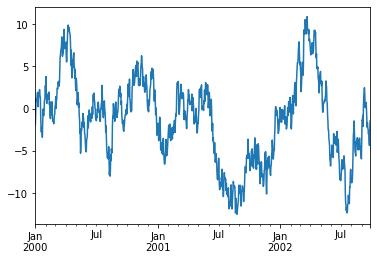

In [98]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
ts.plot()